In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 10)

**Read data**

In [2]:
# Uploaded from C:\Users\wel51x\Box\MyBox\Data\Housing Data
df = pd.read_csv("train.csv")
#df

In [3]:
print(df.BsmtExposure.value_counts())
print("Number of missing BsmtExposure values:", df.isna().sum().BsmtExposure)
# [0 if df.KitchenQual[i] == "Fa" else 1 if df.KitchenQual[i] == "TA" else 2 if df.KitchenQual[i] == "Gd" else 3 for i in range(len(df))]
# sns.barplot(data=df, x="BsmtExposure", y="SalePrice")

#get rows with missing BsmtExposure values
srs = df.BsmtExposure.isna()
missing = srs[srs].index

# split into missing and present dfs
missingdf = pd.DataFrame(df.iloc[[i for i in missing],])
presentdf = pd.DataFrame(df.iloc[[i for i in range(len(df)) if i not in missing],])

# set model & init k value to sqrt(len(df)
classifier = KNeighborsClassifier(int(math.sqrt(len(df))), weights="distance")

# fit model
trained_model = classifier.fit(presentdf[["SalePrice"]], presentdf[["BsmtExposure"]])

# impute missing BsmtExposure values based on neighbors' Sale Prices
imputed_values = trained_model.predict(missingdf[["SalePrice"]])

# plug these back in to missing
missingdf.BsmtExposure = list(imputed_values)

# recreate df
df = presentdf.append(missingdf)
df.sort_values(by="Id", inplace=True)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Number of missing BsmtExposure values: 38


No    987
Av    223
Gd    135
Mn    115
Name: BsmtExposure, dtype: int64


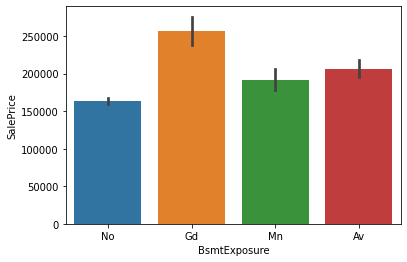

In [4]:
print(df.BsmtExposure.value_counts())
sns.barplot(data=df, x="BsmtExposure", y="SalePrice")

**Clean and encode**

In [5]:
#df = df[["BsmtExposure", "SalePrice"]]
#df

X = pd.DataFrame()
# Transform BsmtExposure No, Mn, Av, rest(Gd) to 0, 1, 2, 3
X["BsmtExposure"] = [0 if df.BsmtExposure[i] == "No" else 1 if df.BsmtExposure[i] == "Mn" else 2 if df.BsmtExposure[i] == "Av" else 3 for i in range(len(df))]

y = df.SalePrice
#print(X.BsmtExposure.value_counts())
#X

**Define model type and fit**

In [6]:
# Step 1: define model
lm = linear_model.LinearRegression()

# Step 2: fit X to Y
lm.fit(X, y)

LinearRegression()

**Results**

In [7]:
print("coeff = ", lm.coef_, "intercept = ", lm.intercept_)

coeff =  [27339.78809882] intercept =  162831.99362776746


In [8]:
BsmtExposure = ["No", "Mn", "Av", "Gd"]
for i in range(4):
  print("For Basement Exposure =", BsmtExposure[i], "==> Sale Price prediction is", int(np.round(lm.predict([[i]]))))

For Basement Exposure = No ==> Sale Price prediction is 162832
For Basement Exposure = Mn ==> Sale Price prediction is 190172
For Basement Exposure = Av ==> Sale Price prediction is 217512
For Basement Exposure = Gd ==> Sale Price prediction is 244851
